In [6]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 12)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:20,.2f}'.format)
plt.style.use('seaborn-v0_8')

## Parsing datasets

fetching data from https://datahub.io/sports-data/english-premier-league

In [7]:
seasons = {}
for i in range(9, 19):
    if i < 10:
        seasons[f'0{i}{i+1}'] = pd.read_csv(f'./datasets/season-0{i}{i+1}.csv')
    else:    
        seasons[f'{i}{i+1}'] = pd.read_csv(f'./datasets/season-{i}{i+1}.csv')
seasons.keys()

dict_keys(['0910', '1011', '1112', '1213', '1314', '1415', '1516', '1617', '1718', '1819'])

In [8]:
print(seasons['0910'].shape)
seasons['0910'].head()

(380, 71)


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,E0,2009-08-15,Aston Villa,Wigan,0,2,A,0,1,A,...,2.04,1.92,1.91,1.81,21,0.00,1.28,1.22,4.40,3.99
1,E0,2009-08-15,Blackburn,Man City,0,2,A,0,1,A,...,2.15,2.04,1.78,1.71,24,0.00,2.58,2.38,1.60,1.54
2,E0,2009-08-15,Bolton,Sunderland,0,1,A,0,1,A,...,2.25,2.12,1.70,1.66,23,0.00,1.68,1.61,2.33,2.23
3,E0,2009-08-15,Chelsea,Hull,2,1,H,1,1,D,...,1.67,1.58,2.44,2.26,22,0.00,1.03,1.02,17.05,12.96
4,E0,2009-08-15,Everton,Arsenal,1,6,A,0,3,A,...,2.20,2.06,1.77,1.70,24,0.00,2.27,2.20,1.73,1.63


In [9]:
seasons['0910'].columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'SBH', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH',
       'VCD', 'VCA', 'BSH', 'BSD', 'BSA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD',
       'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA',
       'BbAvAHA'],
      dtype='object')

## Columns meaning
1. Div: Division
2. Date: Date of the match
3. FTHG: Full Time Home Team Goals
4. FTAG: Full Time Away Team Goals
5. FTR: Full Time Result (H=Home Win, D=Draw, A=Away Win)
6. HTHG: Half Time Home Team Goals
7. HTAG: Half Time Away Team Goals
8. HTR: Half Time Result (H=Home Win, D=Draw, A=Away Win)
9. Referee: Match Referee
10. HS: Home Team Shots
11. AS: Away Team Shots
12. HST: Home Team Shots on Target
13. AST: Away Team Shots on Target
14. HF: Home Team Fouls Committed
15. AF: Away Team Fouls Committed
16. HC: Home Team Corners
17. AC: Away Team Corners
18. HY: Home Team Yellow Cards
19. AY: Away Team Yellow Cards
20. HR: Home Team Red Cards
21. AR: Away Team Red Cards

----------------------- betting odds -------------------------

22. B365H: Bet365 home win odds
23. B365D: Bet365 draw odds
24. B365A: Bet365 away win odds
25. BWH: Bet&Win home win odds
26. BWD: Bet&Win draw odds
27. BWA: Bet&Win away win odds
28. etc...

In [10]:
seasons['0910'].describe(include='all')

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
count,380,380,380,380,380.00,380.00,380,380.00,380.00,380,...,380.00,380.00,380.00,380.00,380.00,380.00,380.00,380.00,380.00,380.00
unique,1,106,20,20,NaN,NaN,3,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,E0,2010-05-09,Aston Villa,Wigan,NaN,NaN,H,NaN,NaN,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,380,10,19,19,NaN,NaN,193,NaN,NaN,153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.70,1.07,NaN,0.74,0.47,NaN,...,2.00,1.89,2.00,1.89,21.42,-0.14,2.24,2.08,3.38,3.01
std,NaN,NaN,NaN,NaN,1.47,1.12,NaN,0.83,0.69,NaN,...,0.23,0.20,0.28,0.24,4.68,0.54,1.65,1.34,3.12,2.44
min,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,0.00,NaN,...,1.45,1.39,1.64,1.57,7.00,-2.25,1.01,1.01,1.07,1.05
25%,NaN,NaN,NaN,NaN,1.00,0.00,NaN,0.00,0.00,NaN,...,1.83,1.75,1.80,1.72,19.00,0.00,1.36,1.33,1.84,1.76
50%,NaN,NaN,NaN,NaN,2.00,1.00,NaN,1.00,0.00,NaN,...,2.03,1.92,1.92,1.82,22.00,0.00,1.75,1.69,2.27,2.13
75%,NaN,NaN,NaN,NaN,2.00,2.00,NaN,1.00,1.00,NaN,...,2.16,2.04,2.13,2.00,25.00,0.00,2.19,2.05,3.40,3.15


## Sorting the data by ranking

In [64]:
# each team's rank
team_rank = {} 
for season in seasons:
    team_score = {}
    for team in seasons[season]['HomeTeam'].unique():
        team_score[team] = 0
        
    for i in range(seasons[season].shape[0]):
        if seasons[season].loc[i, 'FTR'] == 'H':
            team_score[seasons[season].loc[i, 'HomeTeam']] += 3
        elif seasons[season].loc[i, 'FTR'] == 'A':
            team_score[seasons[season].loc[i, 'AwayTeam']] += 3
        else:
            team_score[seasons[season].loc[i, 'HomeTeam']] += 1
            team_score[seasons[season].loc[i, 'AwayTeam']] += 1   
        
    team_rank[season] = sorted(team_score.items(), key=lambda x: x[1], reverse=True)

## Chelsea Records

In [12]:
# chelsea when home or away team

chelsea = pd.DataFrame()

for key in seasons.keys():
    chelsea = pd.concat([chelsea, seasons[key][seasons[key]['HomeTeam'] == 'Chelsea']])
    chelsea = pd.concat([chelsea, seasons[key][seasons[key]['AwayTeam'] == 'Chelsea']])

print(chelsea.shape)
chelsea['Date'] = chelsea['Date'].astype('datetime64[ns]')
chelsea.sort_values(by=['Date'], inplace=True)
# when HomeTeam==Chelsea, if FTR = 'H', chelsea['Win'] = 1
# when AwayTeam==Chelsea, if FTR = 'A', chelsea['Win'] = 1
chelsea['Win'] = np.where((chelsea['HomeTeam'] == 'Chelsea') & (chelsea['FTR'] == 'H'), 1, 0)
chelsea['Win'] = np.where((chelsea['AwayTeam'] == 'Chelsea') & (chelsea['FTR'] == 'A'), 1, chelsea['Win'])
chelsea.head(10)

(380, 77)


/var/folders/zs/rvz3b9gj4fl0_f4rlwvmt2p80000gn/T/ipykernel_8201/2399682862.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  chelsea['Date'] = chelsea['Date'].astype('datetime64[ns]')


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAvAHH,BbMxAHA,BbAvAHA,PSH,PSD,PSA,PSCH,PSCD,PSCA,Win
3,E0,2009-08-15,Chelsea,Hull,2.00,1.00,H,1.00,1.00,D,...,1.02,17.05,12.96,NaN,NaN,NaN,NaN,NaN,NaN,1
10,E0,2009-08-18,Sunderland,Chelsea,1.00,3.00,A,1.00,0.00,H,...,4.94,1.18,1.15,NaN,NaN,NaN,NaN,NaN,NaN,1
23,E0,2009-08-23,Fulham,Chelsea,0.00,2.00,A,0.00,1.00,A,...,4.51,1.20,1.17,NaN,NaN,NaN,NaN,NaN,NaN,1
28,E0,2009-08-29,Chelsea,Burnley,3.00,0.00,H,1.00,0.00,H,...,1.01,15.00,12.74,NaN,NaN,NaN,NaN,NaN,NaN,1
40,E0,2009-09-12,Stoke,Chelsea,1.00,2.00,A,1.00,1.00,D,...,6.32,1.12,1.10,NaN,NaN,NaN,NaN,NaN,NaN,1
52,E0,2009-09-20,Chelsea,Tottenham,3.00,0.00,H,1.00,0.00,H,...,1.86,2.06,2.00,NaN,NaN,NaN,NaN,NaN,NaN,1
63,E0,2009-09-26,Wigan,Chelsea,3.00,1.00,H,1.00,0.00,H,...,7.72,1.08,1.07,NaN,NaN,NaN,NaN,NaN,NaN,0
72,E0,2009-10-04,Chelsea,Liverpool,2.00,0.00,H,0.00,0.00,D,...,1.51,2.67,2.43,NaN,NaN,NaN,NaN,NaN,NaN,1
77,E0,2009-10-17,Aston Villa,Chelsea,2.00,1.00,H,1.00,1.00,D,...,3.18,1.36,1.32,NaN,NaN,NaN,NaN,NaN,NaN,0
88,E0,2009-10-24,Chelsea,Blackburn,5.00,0.00,H,1.00,0.00,H,...,1.80,2.13,2.10,NaN,NaN,NaN,NaN,NaN,NaN,1


## Top 6 teams rank

In [13]:
def get_rank(team, team_rank=team_rank):
    rank = []
    for season in team_rank:
        for i in range(len(team_rank[season])):
            if team_rank[season][i][0] == team:
                rank.append(i+1)
                break
    return rank

top6 = {'Chelsea': None, 'Arsenal': None, 'Liverpool': None, 'Man United': None, 'Tottenham': None, 'Man City': None}
for team in top6:
    top6[team] = get_rank(team)
top6

{'Chelsea': [1, 2, 6, 3, 3, 1, 10, 1, 5, 3],
 'Arsenal': [3, 4, 3, 4, 4, 3, 2, 5, 6, 5],
 'Liverpool': [7, 6, 9, 7, 2, 6, 8, 4, 4, 2],
 'Man United': [2, 1, 2, 1, 7, 4, 4, 6, 2, 6],
 'Tottenham': [4, 5, 4, 5, 6, 5, 3, 2, 3, 4],
 'Man City': [5, 3, 1, 2, 1, 2, 5, 3, 1, 1]}

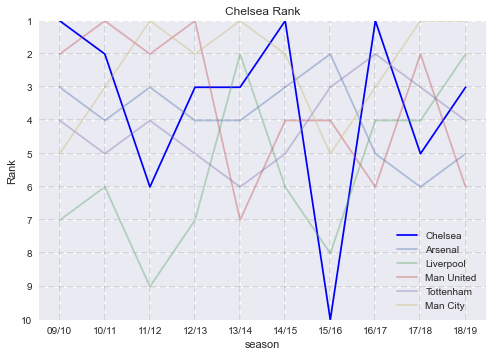

In [63]:
fig, ax = plt.subplots()
plt.xlabel('season')
plt.ylabel('Rank')
plt.title('Chelsea Rank')

for i in range(0, 10):
    ax.axvline(i, ls='--', color='black', alpha=0.1)
    ax.axhline(i, ls='--', color='black', alpha=0.1)
ax.set_ybound([1,10])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xticks(range(0, 10))
ax.set_xticklabels(['09/10', '10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18', '18/19'])

ax.plot(top6['Chelsea'], label = 'Chelsea', color = 'blue')
for team in top6:
    if team == 'Chelsea':
        continue
    ax.plot(top6[team], label = team, alpha = 0.4)
ax.legend(loc='lower right')

### main question
* chelsea to win the league, how many games they need?
* chelsea to win how many goals they need?
* chelsea to win the league, how much the other teams affect the result?
* 강팀 top6를 상대로 좋은 결과를 보인 시즌일 경우 우승할 확률이 높을까?

### statistical analysis
* coefficients
* correlation
* p-value
* t-test
* anova
* chi-square test
* residuals
* residuals plot
* qq plot
* normality test
* variance inflation factor
* outliers
* multicollinearity
* confusion matrix

### model
* linear regression
* logistic regression
* lda, qda, knn, 
* svm
* boosting
* cross validation (k-fold)

# Statistical Analysis

In [ ]:
# chelsea's feature confusion matrix
import seaborn as sns

sns.pairplot(chelsea, hue='Win', vars=['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']) # wihout betting odds

In [ ]:
# 